# Chapter 2 Data and Sampling Distributions
### Imported libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### Sampling Distribution of a Statistic

In [9]:
loan_income = pd.read_csv('loans_income.csv').squeeze('columns')
loan_income.head()

0     67000
1     52000
2    100000
3     78762
4     37041
Name: x, dtype: int64

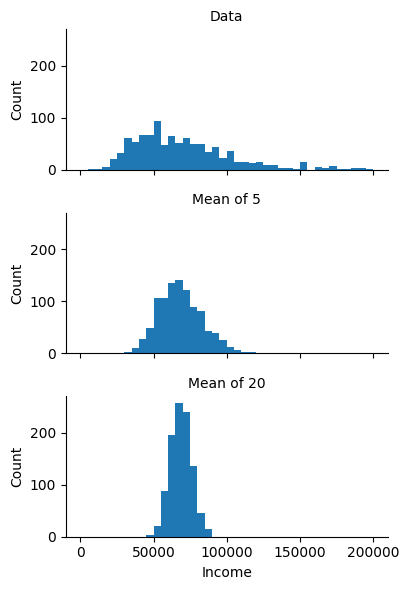

In [13]:
sample_data = pd.DataFrame({
    'income':loan_income.sample(1000),
    'type': 'Data'
})
sample_mean_05 = pd.DataFrame({
    'income': [loan_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})
sample_mean_20 = pd.DataFrame({
    'income': [loan_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income','Count')
g.set_titles('{col_name}')

### The Bootstrap

In [14]:
from sklearn.utils import resample

results = []
for nrepeat in range(1000):
    sample = resample(loan_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loan_income.median()}')
print(f'bias: {results.mean() - loan_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -80.21300000000338
std. error: 223.35700455209027


### Standard Normal and QQ-Plots

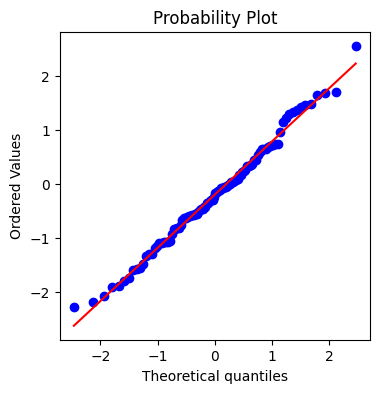

In [16]:
fig, ax = plt.subplots(figsize=(4,4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)
plt.show()

### Long-Tailed Distributions

((array([-3.33278964, -3.07756454, -2.93575124, ...,  2.93575124,
          3.07756454,  3.33278964]),
  array([-6.60529819, -6.09667121, -5.40220961, ...,  5.12547859,
          5.87072271,  6.03787   ])),
 (1.4823778663727085, 0.0015561067366313861, 0.9941828221936314))

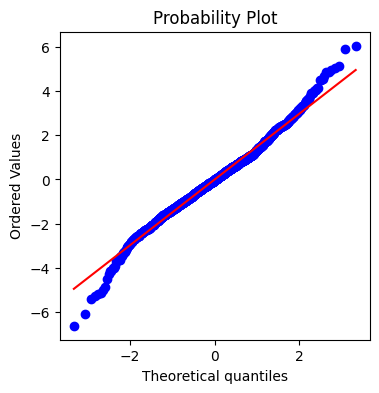

In [20]:
sp500_px = pd.read_csv('sp500_data.csv')

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))
fig, ax = plt.subplots(figsize=(4,4)) 
stats.probplot(nflx, plot=ax)

### Binomial Distribution

In [22]:
stats.binom.pmf(2, n=5, p=0.1)

0.07289999999999992

In [23]:
stats.binom.cdf(2, n=5, p=0.1)

0.99144

### Poisson Distribution

In [24]:
stats.poisson.rvs(2, size=100)

array([1, 3, 1, 3, 1, 3, 2, 2, 1, 3, 1, 1, 5, 0, 2, 0, 0, 2, 2, 0, 4, 1,
       4, 6, 4, 3, 3, 0, 3, 1, 3, 0, 3, 3, 1, 2, 0, 0, 4, 1, 2, 2, 0, 2,
       3, 0, 1, 0, 2, 1, 3, 2, 2, 4, 6, 2, 1, 2, 3, 1, 4, 4, 0, 4, 0, 4,
       0, 2, 2, 5, 4, 1, 2, 4, 0, 1, 4, 2, 3, 0, 2, 0, 2, 2, 3, 1, 2, 2,
       1, 2, 2, 4, 1, 2, 2, 3, 2, 1, 1, 4], dtype=int64)

### Exponential Distribution

In [25]:
stats.expon.rvs(0.2, size=100)

array([0.26781237, 2.03813471, 3.44852107, 1.72404744, 2.02089263,
       2.55673701, 1.90312699, 0.54293063, 0.43063014, 0.69397619,
       0.44222683, 2.02612225, 0.82431209, 0.30432207, 0.43664393,
       1.28389362, 1.86801635, 3.42406398, 1.38290538, 1.41218345,
       0.453744  , 1.08305199, 2.86916923, 0.39193284, 0.9062862 ,
       0.23860981, 1.38668669, 2.63519676, 0.92373819, 2.08350559,
       3.15160555, 0.97664202, 0.39427179, 1.58935754, 0.31196729,
       0.39970503, 0.43711573, 0.43520978, 0.32910995, 5.34350071,
       0.92816518, 0.27204252, 0.59715748, 0.58543442, 1.49043324,
       0.55400865, 1.02267398, 0.31506587, 0.91562448, 0.31877308,
       1.73521245, 0.84795472, 6.37389437, 0.92326127, 0.7721881 ,
       0.75502726, 1.17508762, 0.34775841, 0.44807272, 0.41639663,
       0.61507791, 4.67035641, 0.41317782, 2.05959483, 0.77826634,
       0.59538976, 0.61325199, 0.26628546, 1.20127925, 0.31665195,
       0.29644182, 0.84192253, 0.7003652 , 0.26245895, 1.38800

### Weibull Distribution

In [26]:
stats.weibull_min.rvs(1.5, scale=5000, size=100)

array([ 1175.74428609,  3064.19151288,  4440.37867909,  2674.57018552,
        4556.06919728,  7437.05304212,  4046.45486993,  1751.02535642,
        1462.91036638,  4707.77756611,   233.92864815,  3408.00191959,
        7263.52263637,  9381.11489623, 15836.18089886,  5304.27036757,
        3141.58683618,  1312.08469149,   652.89224193, 15117.92443882,
        2597.95331613,  6424.56413154,  8349.88584548,  4716.01683738,
        3791.0947081 ,  2448.30298741,  4841.21314428,  7328.88065879,
        4074.4905655 ,  5178.28963682,   275.28156812,  5123.5929206 ,
       15171.17052337,  1272.64831545,  5653.7998546 ,  5995.52246862,
        3248.73369058,   244.92316574,  5974.12730962,   233.41184414,
        2966.36130119,  5317.29304736,  3997.69571615,  3132.9000521 ,
        4246.88214588,  2893.56262747,  7866.17837434, 11516.35393395,
        2845.28009601,  4807.79255754,  2555.31451672,  3721.09624088,
        4918.51649486,  2928.82676944,  8794.68578094,  6174.14545033,
      